In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from isyatirimhisse import StockData

plt.style.use('fivethirtyeight')

In [147]:
tickers = ["ALARK", "MGROS", "MAVI", "ISMEN", "THYAO", "KCHOL", 
           "FROTO", "TCELL", "PGSUS", "DOAS", "ISCTR", "GRSEL",
           "TAVHL", "AGHOL", "ULKER", "AEFES", "ANSGR", "BIMAS",
           "TOASO", "GARAN", "AKBNK", "CIMSA", "AKGRT", "TRGYO"]

start_date = "10-04-2022"
num_stocks = len(tickers)
num_stocks

24

In [113]:
stock_data = StockData()
data = stock_data.get_data(symbols=tickers, start_date=start_date, exchange='0')
data.head()

,DATE,CLOSING_TL,LOW_TL,HIGH_TL,VOLUME_TL,XU100_TL,CODE
0,2022-04-11,26.4185,26.127150,27.622906,297274384.0,2449.11,ALARK
1,2022-04-12,26.4185,25.719213,26.690485,290531032.0,2463.76,ALARK
2,2022-04-13,26.2049,25.777494,26.787611,225160398.0,2460.43,ALARK
3,2022-04-14,26.5934,26.088299,26.807037,183564269.0,2475.41,ALARK
4,2022-04-15,27.6423,26.243700,27.681180,423143323.0,2494.37,ALARK


In [114]:

data_pivot = data.pivot(index='DATE', columns='CODE', values='CLOSING_TL').dropna(axis=1)
data_pivot.head()

CODE,AEFES,AGHOL,AKBNK,AKGRT,ALARK,ANSGR,BIMAS,CIMSA,DOAS,FROTO,...,KCHOL,MAVI,MGROS,PGSUS,TAVHL,TCELL,THYAO,TOASO,TRGYO,ULKER
DATE,,,,,,,,,,,,,,,,,,,,,
2022-04-11,26.5680,38.9743,7.9552,1.8451,26.4185,5.86,79.3102,4.7613,53.7664,274.6057,...,41.6637,9.1478,45.7848,117.4,43.32,21.5560,36.16,73.0949,6.8312,17.20
2022-04-12,26.7322,41.8876,7.9204,1.8553,26.4185,5.99,79.7851,4.8637,52.8682,274.1570,...,41.2921,9.4246,47.0063,122.8,43.86,21.1951,37.24,72.8259,6.7918,17.42
2022-04-13,26.4585,40.3916,7.8161,1.8247,26.2049,5.99,81.0199,4.8609,51.8416,271.0161,...,40.0598,9.6720,46.4743,121.9,42.76,21.4420,36.98,71.9738,6.6143,17.28
2022-04-14,26.4767,40.5687,8.0334,1.8655,26.5934,6.15,80.6874,4.8692,53.0392,271.2853,...,39.4729,9.7073,46.5925,121.9,42.68,21.8598,37.36,74.8438,7.0579,17.86
2022-04-15,26.7140,40.5097,8.1726,1.8706,27.6423,6.19,80.4025,5.0159,55.9906,274.6057,...,39.8446,9.7604,46.3167,122.5,42.70,21.9548,37.74,76.5030,7.1664,17.75


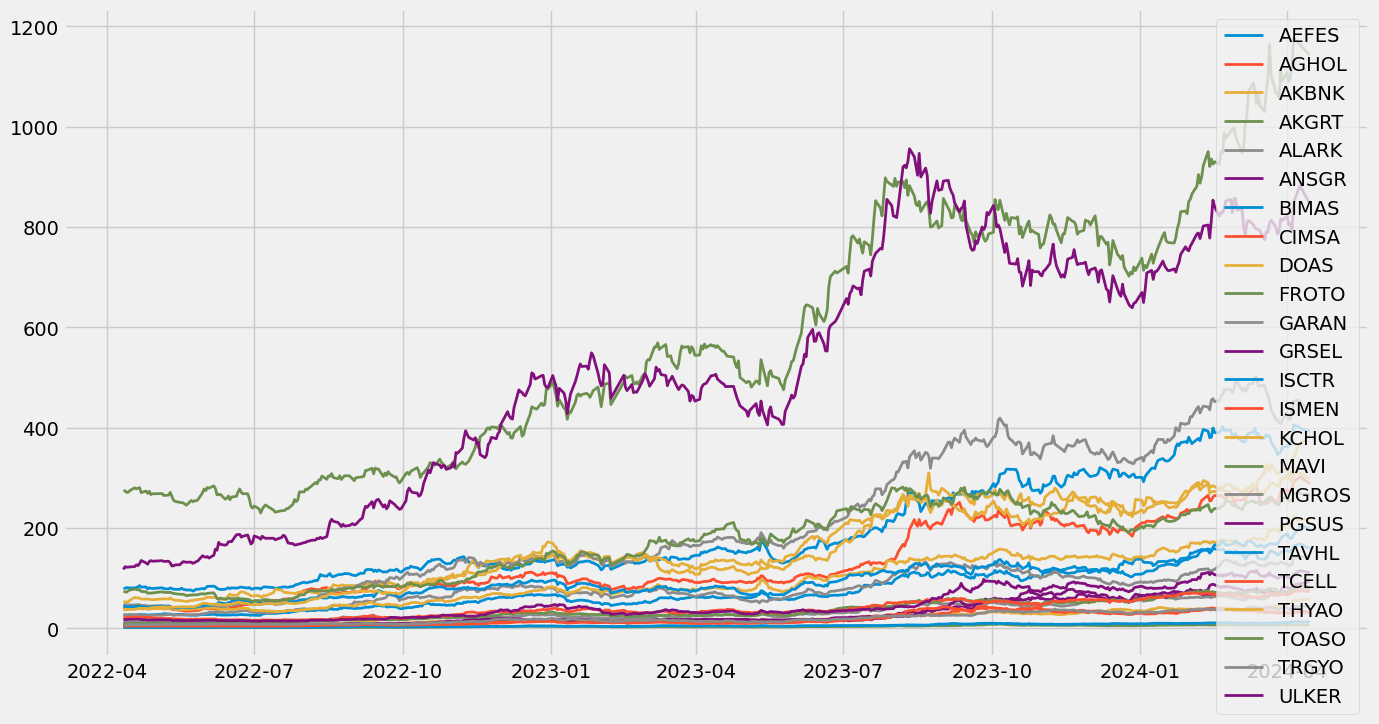

In [115]:
plt.figure(figsize=(15,8))
# Loop through each column in the DataFrame and plot it
for column in data_pivot.columns:
    plt.plot(data_pivot[column], label=column, linewidth=2)

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [116]:
returns = data_pivot.pct_change()
returns.head()

CODE,AEFES,AGHOL,AKBNK,AKGRT,ALARK,ANSGR,BIMAS,CIMSA,DOAS,FROTO,...,KCHOL,MAVI,MGROS,PGSUS,TAVHL,TCELL,THYAO,TOASO,TRGYO,ULKER
DATE,,,,,,,,,,,,,,,,,,,,,
2022-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-12,0.006180,0.074749,-0.004374,0.005528,0.000000,0.022184,0.005988,0.021507,-0.016706,-0.001634,...,-0.008919,0.030259,0.026679,0.045997,0.012465,-0.016742,0.029867,-0.003680,-0.005768,0.012791
2022-04-13,-0.010239,-0.035715,-0.013169,-0.016493,-0.008085,0.000000,0.015477,-0.000576,-0.019418,-0.011457,...,-0.029843,0.026250,-0.011318,-0.007329,-0.025080,0.011649,-0.006982,-0.011701,-0.026134,-0.008037
2022-04-14,0.000688,0.004385,0.027802,0.022360,0.014825,0.026711,-0.004104,0.001708,0.023101,0.000993,...,-0.014651,0.003650,0.002543,0.000000,-0.001871,0.019485,0.010276,0.039876,0.067067,0.033565
2022-04-15,0.008963,-0.001454,0.017328,0.002734,0.039442,0.006504,-0.003531,0.030128,0.055646,0.012240,...,0.009417,0.005470,-0.005919,0.004922,0.000469,0.004346,0.010171,0.022169,0.015373,-0.006159


In [141]:
# Bütün hisse fiyatlarını tarih aralığımızdaki başlangıç fiyatına bölüp 100 ile çarpıyoruz.
returns_comparision = data_pivot / data_pivot.iloc[0] * 100
returns_comparision.head()

CODE
ANSGR    1387.372014
GRSEL    1168.471418
MGROS     945.182681
MAVI      910.054877
THYAO     825.497788
ISMEN     754.794054
AGHOL     738.307038
AKBNK     734.111022
ISCTR     728.951594
PGSUS     720.613288
DOAS      716.060588
CIMSA     664.104341
ULKER     645.348837
TRGYO     636.784167
GARAN     617.595682
AEFES     597.335140
ALARK     545.072582
KCHOL     519.396981
BIMAS     495.207426
TAVHL     457.294552
FROTO     416.233166
TOASO     363.910478
AKGRT     363.665926
TCELL     339.812581
Name: 2024-04-15, dtype: float64

In [119]:
# Belirtilen zaman aralığındaki hisselerin yıllıklandırılmış getirileri
(returns.mean()*252).sort_values().sort_values(ascending=False)

CODE
ANSGR    1.443590
GRSEL    1.410537
MGROS    1.232019
MAVI     1.213013
ISMEN    1.167784
THYAO    1.166214
ISCTR    1.161692
AKBNK    1.152007
AGHOL    1.136400
DOAS     1.122693
PGSUS    1.107349
CIMSA    1.105674
ULKER    1.096615
TRGYO    1.069384
GARAN    1.063967
AEFES    1.005885
ALARK    0.980993
KCHOL    0.923598
BIMAS    0.889536
TAVHL    0.868062
FROTO    0.801127
AKGRT    0.795504
TOASO    0.754955
TCELL    0.731529
dtype: float64

In [120]:
import plotly.graph_objs as go

# Create traces for each column in the DataFrame
traces = []
for column in returns_comparision.columns:
    trace = go.Scatter(
        x=returns_comparision.index,
        y=returns_comparision[column],
        mode='lines',
        name=column,
        line=dict(width=2),
    )
    traces.append(trace)

# Define layout options
layout = go.Layout(
    title='Stock Returns Comparison',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Normalized Price (First date = 100)'),
    legend=dict(x=0, y=1, traceorder='normal'),
    width=1200,  # Adjust the width as desired
    height=800   # Adjust the height as desired
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [222]:
#Single Run for a specifi weighted portfolio
np.random.seed(42)
print(tickers)
# weights = np.array(np.random.random(num_stocks))
print("My actual alocations")
weights = [13.42, 6.66, 6.75, 5.76, 5.13, 4.44, 4.28, 4.23, 4.03, 3.55, 2.83, 3.25, 
           2.63, 2.12, 2.01, 1.74, 1.69, 1.68, 1.62, 1.37, 1.26, 0.97, 0.92, 0.93 ]
print(weights)
print("Rebalanced Weights")
weights = weights / np.sum(weights)
print(weights)
print("Portfolio Return")
port_ret = np.sum(returns.mean()*weights*252 )
print(port_ret)
print("Expected Volatility")
port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
print(port_vol)
print("Sharpe Ratio")
SR = (port_ret)/port_vol
print(SR)

['ALARK', 'MGROS', 'MAVI', 'ISMEN', 'THYAO', 'KCHOL', 'FROTO', 'TCELL', 'PGSUS', 'DOAS', 'ISCTR', 'GRSEL', 'TAVHL', 'AGHOL', 'ULKER', 'AEFES', 'ANSGR', 'BIMAS', 'TOASO', 'GARAN', 'AKBNK', 'CIMSA', 'AKGRT', 'TRGYO']
My actual alocations
[13.42, 6.66, 6.75, 5.76, 5.13, 4.44, 4.28, 4.23, 4.03, 3.55, 2.83, 3.25, 2.63, 2.12, 2.01, 1.74, 1.69, 1.68, 1.62, 1.37, 1.26, 0.97, 0.92, 0.93]
Rebalanced Weights
[0.16116248 0.07998079 0.08106161 0.06917257 0.06160682 0.05332052
 0.05139906 0.05079861 0.04839678 0.0426324  0.03398583 0.03902966
 0.031584   0.02545935 0.02413835 0.02089588 0.02029542 0.02017533
 0.01945479 0.0164525  0.0151315  0.01164885 0.0110484  0.01116849]
Portfolio Return
1.061245243642765
Expected Volatility
0.3171643074791416
Sharpe Ratio
3.346042472678166


In [228]:
import random
# Define the number of stocks in each portfolio
num_stocks_in_portfolio = 20

# Define the number of portfolios to generate
num_ports = 10000

# Initialize arrays to store results for all portfolios
all_weights = np.zeros((num_ports, num_stocks_in_portfolio))
selected_tickers_arr = np.empty((num_ports, num_stocks_in_portfolio), dtype=object)
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# Loop to generate multiple portfolios
for i in range(num_ports):
    # Randomly select tickers for the portfolio
    selected_tickers = random.sample(tickers, num_stocks_in_portfolio)

    # Generate random weights for the selected tickers
    weights = np.array(np.random.random(num_stocks_in_portfolio))
    weights = weights / np.sum(weights)
    all_weights[i, :] = weights
    selected_tickers_arr[i, :] = selected_tickers
    # Calculate expected return
    ret_arr[i] = np.sum(returns[selected_tickers].mean() * weights * 252)
    
    # Calculate expected volatility
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns[selected_tickers].cov() * 252, weights)))
    
    # Calculate Sharpe ratio
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

sharpe_max = sharpe_arr.max()
sharpe_max_loc = sharpe_arr.argmax()
sharpe_max_vol = vol_arr[sharpe_max_loc]
sharpe_max_ret = ret_arr[sharpe_max_loc]

# Display the results
print("Best Portfolio:")
print("Selected Tickers:", selected_tickers_arr[sharpe_max_loc,:])
print("Selected Tickers weights:", all_weights[sharpe_max_loc,:])
print("Max Sharpe Ratio:", sharpe_max)
print("Annualized return of the portfolio with maximum sharpe:", ret_arr[sharpe_max_loc])
print("Volatility of the portfolio with maximum sharpe:", vol_arr[sharpe_max_loc])


Best Portfolio:
Selected Tickers: ['FROTO' 'AGHOL' 'TRGYO' 'MAVI' 'ISMEN' 'AKBNK' 'ISCTR' 'TAVHL' 'BIMAS'
 'ANSGR' 'THYAO' 'DOAS' 'CIMSA' 'TOASO' 'KCHOL' 'GARAN' 'PGSUS' 'AEFES'
 'MGROS' 'GRSEL']
Selected Tickers weights: [0.02662745 0.03932952 0.00603015 0.06663373 0.04529555 0.00680127
 0.00658258 0.04122682 0.07572752 0.11615935 0.07705327 0.07930681
 0.00753885 0.02927211 0.10451809 0.00300423 0.03306267 0.08009424
 0.0442561  0.1114797 ]
Max Sharpe Ratio: 3.684640975750947
Annualized return of the portfolio with maximum sharpe: 1.1305256049738295
Volatility of the portfolio with maximum sharpe: 0.3068211020867299


Maximum Sharpe Ratio: 3.6846
Stocks and Weights of the Portfolio with Maximum Sharpe Ratio:
FROTO: 2.66%
AGHOL: 3.93%
TRGYO: 0.60%
MAVI: 6.66%
ISMEN: 4.53%
AKBNK: 0.68%
ISCTR: 0.66%
TAVHL: 4.12%
BIMAS: 7.57%
ANSGR: 11.62%
THYAO: 7.71%
DOAS: 7.93%
CIMSA: 0.75%
TOASO: 2.93%
KCHOL: 10.45%
GARAN: 0.30%
PGSUS: 3.31%
AEFES: 8.01%
MGROS: 4.43%
GRSEL: 11.15%
Return of the Portfolio with Maximum Sharpe Ratio: 113.05%
Volatility of the Portfolio with Maximum Sharpe Ratio: 30.68%


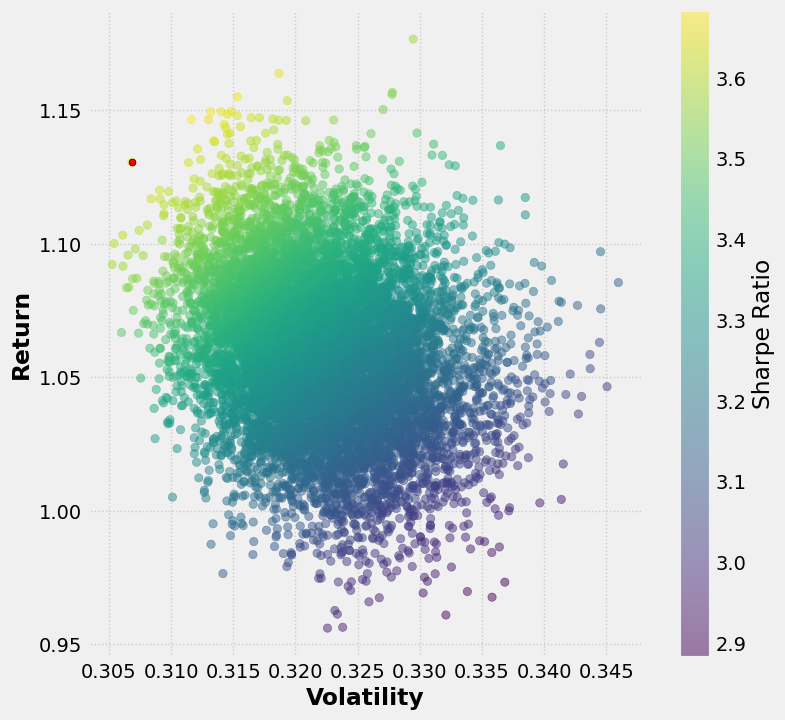

In [229]:
plt.figure(figsize=(8,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap="viridis", alpha=0.5)
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("Volatility", fontweight = "bold")
plt.ylabel("Return", fontweight = "bold")

plt.scatter(sharpe_max_vol, sharpe_max_ret, c="red", s=24, edgecolors="black")
plt.grid(True, ls=":", lw=1)

result = (
    f"Maximum Sharpe Ratio: {sharpe_max:.4f}\n"
    f"Stocks and Weights of the Portfolio with Maximum Sharpe Ratio:\n"
)

for stock, weight in zip(selected_tickers_arr[sharpe_arr.argmax(),:], all_weights[sharpe_arr.argmax(),:]):
    result += f"{stock}: {weight * 100:.2f}%\n"

result += (
    f"Return of the Portfolio with Maximum Sharpe Ratio: {sharpe_max_ret * 100:.2f}%\n"
    f"Volatility of the Portfolio with Maximum Sharpe Ratio: {sharpe_max_vol * 100:.2f}%"
)

print(result)